In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# data already exists in seaborn
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


## SEABORN

### sns.lineplot()

Text(0, 0.5, 'Signal')

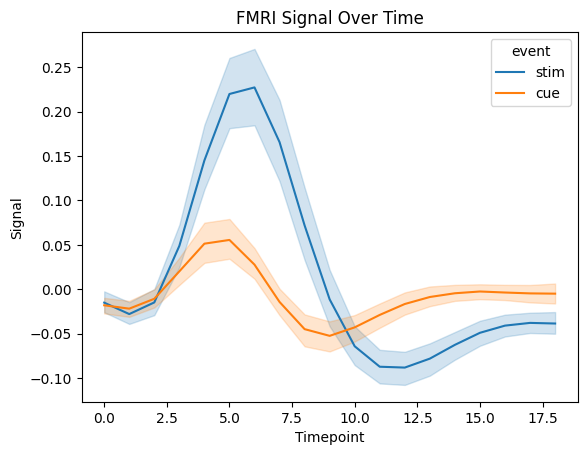

In [12]:
# sns.lineplot() - By default, the plot aggregates over multiple y values 
# at each value of x and shows an estimate of the central tendency
# and a confidence interval for that estimate.

sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)
plt.title("FMRI Signal Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Signal")

# hue - Grouping variable that will produce lines 
# with different colors. Can be either categorical or numeric, 
# although color mapping will behave differently in latter case.

### sns.barplot()

In [13]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='day', ylabel='total_bill'>

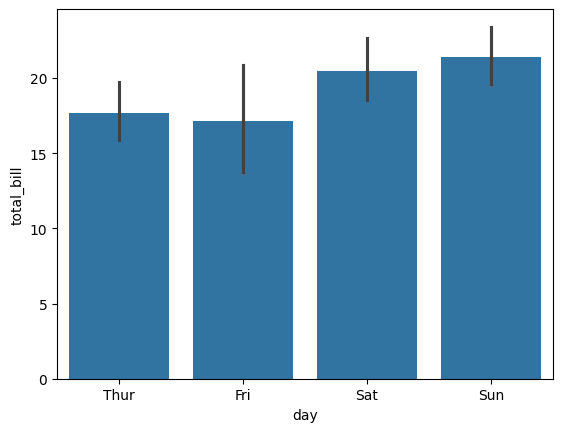

In [14]:
# sns.barplot()
sns.barplot(x='day',y='total_bill',data=tips)


<Axes: xlabel='day', ylabel='total_bill'>

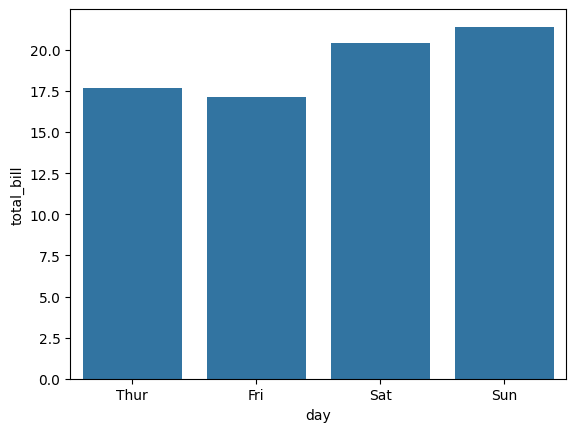

In [15]:
# remove error bar errorbar=None
sns.barplot(x='day',y='total_bill',data=tips, errorbar=None)


<Axes: xlabel='day', ylabel='total_bill'>

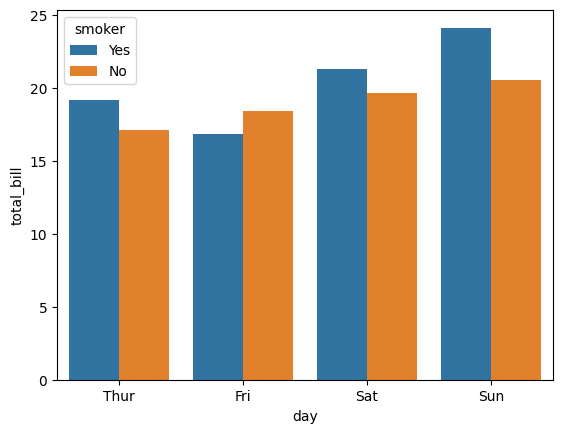

In [16]:
# adding hue
sns.barplot(x='day',y='total_bill',data=tips, errorbar=None, hue ='smoker')


### sns.catplot() 

AttributeError: Rectangle.set() got an unexpected keyword argument 'col'

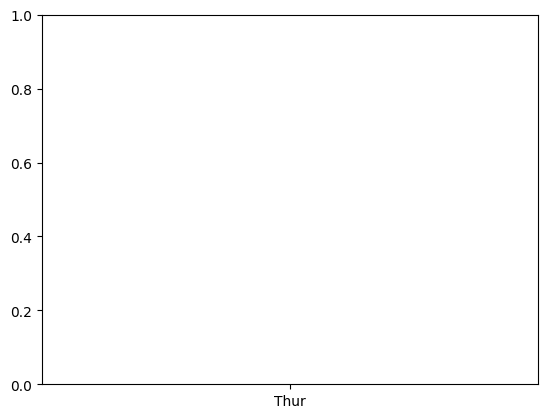

In [17]:
sns.barplot(x='day',y='total_bill',data=tips, errorbar=None, hue='smoker',col='sex')


### sns.load_dataset()

In [55]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


### flights.pivot() - wide format

In [68]:
fp = flights.pivot(columns='month', index="year",values="passengers")
fp

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


### sns.heatmap()

<Axes: xlabel='month', ylabel='year'>

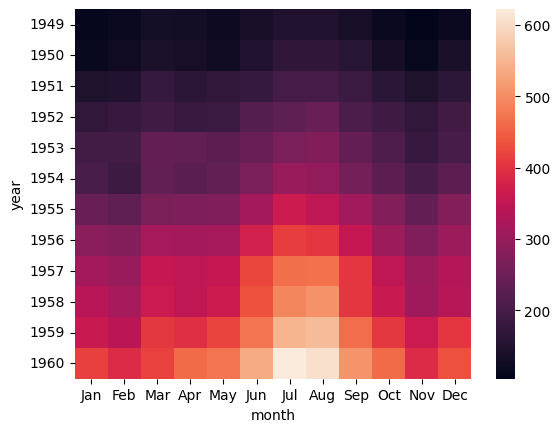

In [69]:
sns.heatmap(fp, annot=False, fmt='d')

## MATPLOTLIB

### plt.plot()

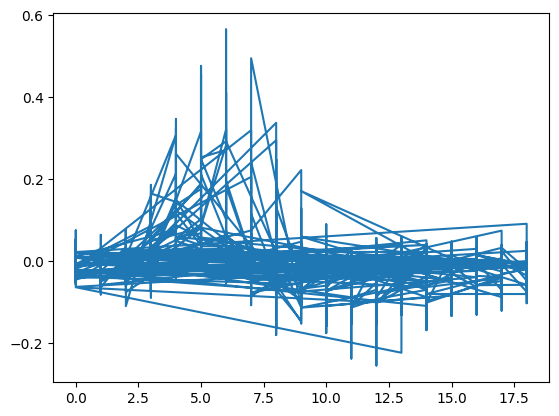

In [70]:
# plt.plot - plots y versus x as lines and/or markers.
plt.plot(fmri.timepoint, fmri.signal)

### plt.bar()

Text(0.5, 1.0, 'Total Bill by Day of Week')

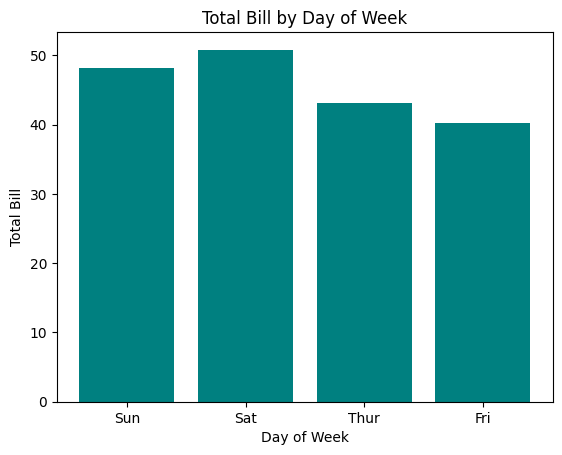

In [71]:
# plt.bar() bars are positioned at x with the given alignement. 
# The dimensions are taking by the height and width, doesn't take average mean or anything
# takes the max values for each bill at the moment.
plt.bar(tips.day,tips.total_bill, color = 'teal')
plt.xlabel('Day of Week')
plt.ylabel("Total Bill")
plt.title('Total Bill by Day of Week')

In [1]:
# CLEANING METHODS
data = {
    'Region': ['London','South East','North West', 'London',np.nan],
    'Year': [2020,2020,2020,2021,2021],
    'House Price': [500000,350000,np.nan,52000,40000],
    'Earnings': [40000,35000,30000,np.nan,32000]
}

df = pd.DataFrame(data)
df

# RETURN COLUMNS THAT YOU WANT
print(df[['Region','Earnings']])
print(df.iloc[0])
print(df.loc[2:4])
print(df[df['Region'] == 'London'])
df.columns
df.dtypes

# FIND THE MEAN OF THE SPECIFIC COLUMN
avg_house_price = df['House Price'].mean(numeric_only=True)
avg_earnings = df['Earnings'].mean(numeric_only=True)
float(avg_house_price)

df_cln = df.copy()
# FILL THE NAN WITH THE MEAN GAP
df_cln['House Price']=df_cln['House Price'].fillna(avg_house_price)
df_cln['Earnings']=df_cln['Earnings'].fillna(avg_earnings)
df_cln

# DETECT DUPLICATES
df_cln.duplicated().sum()
df = df.drop_duplicates()

# FIXING DATA TYPES
df['column'] = df['column'].astype(int)
df['date_column'] = pd.to_datetime(df['date_column'], errors='coerce')

# STANDARDISE TEXT DATA
df['column'] = df['column'].str.lower()
df['column'] = df['column'].str.title()

# TRIM WHITESPACE
df['column'] = df['column'].str.strip()

# REMOVE SPECIAL CHARACTERS/ PUNCTUATION
df['column'] = df['column'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# FIX TYPOS OR INCOSISTENT CATEGROIES
df['column'] = df['column'].replace({'NYC': 'New York', 'newyork': 'New York'})

# FOLLOWING ARE SCALAR
42              # int
3.14            # float
'hello'         # string
True            # boolean
np.float64(3.14)  # NumPy scalar

# FOLLOWING ARE COLLECTIONS
[1, 2, 3]              # list
{'a': 1, 'b': 2}       # dict
np.array([1, 2, 3])    # NumPy array
pd.Series([1, 2, 3])   # Pandas Series

# GOOD JOB!


NameError: name 'np' is not defined